In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

file_path = 'depression_data.csv'
depression_data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset to understand its structure
depression_data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
# Basic statistics and missing values check
summary_stats = depression_data.describe(include='all')
print(summary_stats)

                 Name            Age Marital Status    Education Level  \
count          413768  413768.000000         413768             413768   
unique         196851            NaN              4                  5   
top     Michael Smith            NaN        Married  Bachelor's Degree   
freq              198            NaN         240444             124329   
mean              NaN      49.000713            NaN                NaN   
std               NaN      18.158759            NaN                NaN   
min               NaN      18.000000            NaN                NaN   
25%               NaN      33.000000            NaN                NaN   
50%               NaN      49.000000            NaN                NaN   
75%               NaN      65.000000            NaN                NaN   
max               NaN      80.000000            NaN                NaN   

        Number of Children Smoking Status Physical Activity Level  \
count        413768.000000         413768 

In [5]:
# Check for missing values
missing_values = depression_data.isnull().sum()
print(missing_values)

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


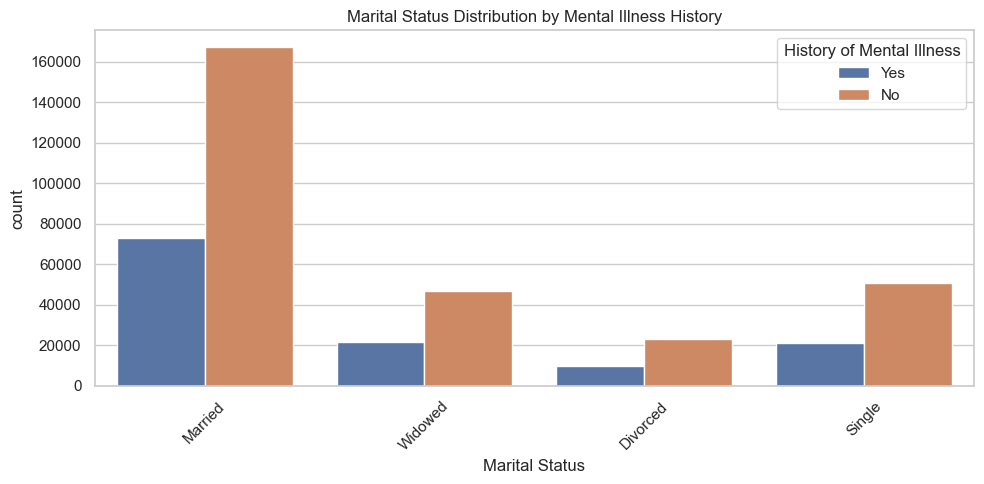

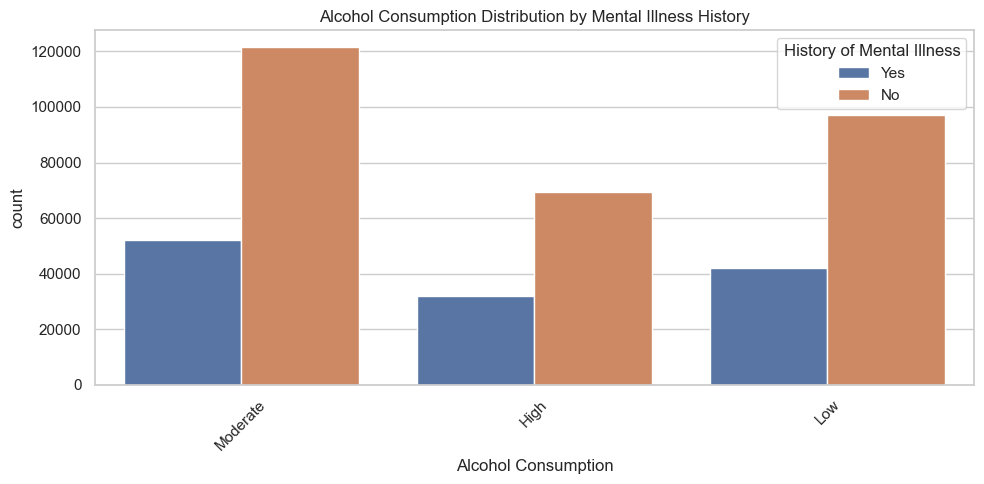

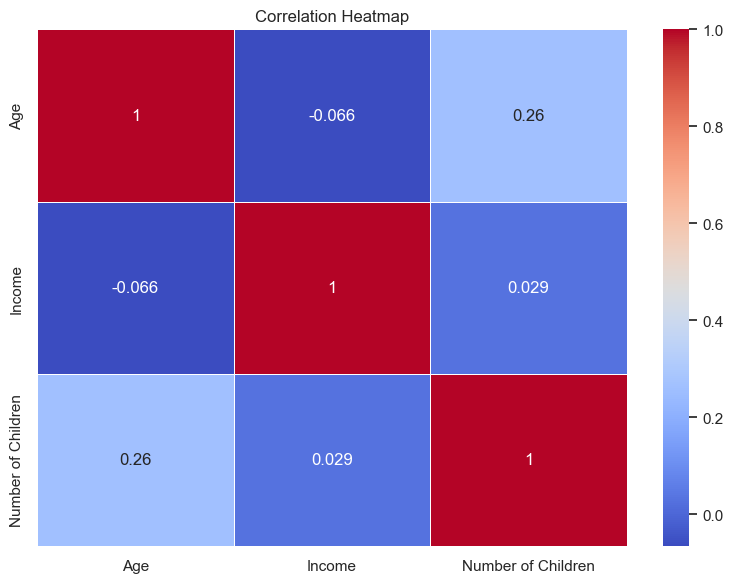

In [6]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of Marital Status
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital Status', hue='History of Mental Illness', data=depression_data)
plt.title('Marital Status Distribution by Mental Illness History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alcohol consumption comparison based on mental illness history
plt.figure(figsize=(10, 5))
sns.countplot(x='Alcohol Consumption', hue='History of Mental Illness', data=depression_data)
plt.title('Alcohol Consumption Distribution by Mental Illness History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical data
numerical_data = depression_data[['Age', 'Income', 'Number of Children']]
correlation = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


**Key Insights from Exploratory Data Analysis:
Marital Status:**

Individuals who are married seem to have a slightly lower prevalence of mental illness history compared to those who are widowed, divorced, or single.
Alcohol Consumption:

Moderate alcohol consumption appears more common among individuals without a history of mental illness, whereas individuals with a history of mental illness are more spread out across low and moderate consumption categories.
Correlation Heatmap:

The correlation between numerical variables such as age, income, and number of children is weak, suggesting these features may not strongly interact with each other. However, these may still be useful for predicting mental illness when combined with other factors.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in depression_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    depression_data[column] = label_encoders[column].fit_transform(depression_data[column])

# Split the data into features and target variable
X = depression_data.drop('History of Mental Illness', axis=1)
y = depression_data['History of Mental Illness']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We'll start by trying a Random Forest Classifier and a Logistic Regression model to compare their performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Performance report for both models
rf_report = classification_report(y_test, rf_predictions)
lr_report = classification_report(y_test, lr_predictions)

rf_report, lr_report


('              precision    recall  f1-score   support\n\n           0       0.70      0.95      0.80     57471\n           1       0.38      0.07      0.12     25283\n\n    accuracy                           0.68     82754\n   macro avg       0.54      0.51      0.46     82754\nweighted avg       0.60      0.68      0.60     82754\n',
 '              precision    recall  f1-score   support\n\n           0       0.69      1.00      0.82     57471\n           1       0.00      0.00      0.00     25283\n\n    accuracy                           0.69     82754\n   macro avg       0.35      0.50      0.41     82754\nweighted avg       0.48      0.69      0.57     82754\n')

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
# Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [10]:
# Train the Random Forest model again on the balanced dataset
random_forest_smote = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
rf_preds_smote = random_forest_smote.predict(X_test)

In [12]:
# Evaluate the Random Forest model on the test data after SMOTE
from sklearn.metrics import classification_report, roc_auc_score
rf_report_smote = classification_report(y_test, rf_preds_smote)
rf_auc_smote = roc_auc_score(y_test, rf_preds_smote)

rf_report_smote, rf_auc_smote

('              precision    recall  f1-score   support\n\n           0       0.71      0.78      0.74     57471\n           1       0.34      0.27      0.30     25283\n\n    accuracy                           0.62     82754\n   macro avg       0.53      0.52      0.52     82754\nweighted avg       0.60      0.62      0.61     82754\n',
 0.5215343051290768)

## Hyperparameter Tuning

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist,
                                   n_iter=10, cv=2, n_jobs=-1, verbose=2, random_state=42, scoring='roc_auc')

# Fit the random search to the data (using SMOTE-balanced data)
random_search.fit(X_train_smote, y_train_smote)

# Get the best parameters from the search
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Evaluate the tuned model on the test set
best_rf_model = random_search.best_estimator_
rf_preds_tuned = best_rf_model.predict(X_test)

# Get the evaluation report
rf_report_tuned = classification_report(y_test, rf_preds_tuned)
rf_auc_tuned = roc_auc_score(y_test, rf_preds_tuned)

print(rf_report_tuned)
print(f"ROC-AUC score after tuning: {rf_auc_tuned}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=9, n_estimators=472; total time= 2.3min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=158; total time=  47.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=6, n_estimators=370; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=260; total time= 1.3min
[CV] END max_depth=30, min_samples_leaf=3, min_samples_split=9, n_estimators=472; total time= 2.5min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=158; total time=  48.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=9, n_estimators=230; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=7, n_estimators=485; total time= 2.3min
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=314; total time= 1.8min
[CV] END max_depth=N

# Ensemble Techniques

## XGBoost

In [14]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic', 
    scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]),  # Handling class imbalance
    use_label_encoder=False,
    eval_metric='logloss',  # A common evaluation metric for binary classification
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate the model
xgb_report = classification_report(y_test, xgb_preds)
xgb_auc = roc_auc_score(y_test, xgb_preds)

# Display the report and AUC
print("XGBoost Classification Report:")
print(xgb_report)
print(f"ROC-AUC Score: {xgb_auc}")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76     57471
           1       0.35      0.22      0.27     25283

    accuracy                           0.64     82754
   macro avg       0.53      0.52      0.51     82754
weighted avg       0.60      0.64      0.61     82754

ROC-AUC Score: 0.5198005567630579


## LightGBM

In [15]:
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score
from lightgbm import LGBMClassifier

# Initialize the LightGBM model
lgb_model = LGBMClassifier(
    objective='binary', 
    is_unbalance=True,  # Automatically balances classes
    random_state=42,
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.05,  # Learning rate to control the size of a step during optimization
    max_depth=20,  # Maximum depth of the trees
)

# Train the model
lgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
lgb_preds = lgb_model.predict(X_test)

# Evaluate the model
lgb_report = classification_report(y_test, lgb_preds)
lgb_auc = roc_auc_score(y_test, lgb_preds)

# Print the classification report and ROC-AUC score
print("LightGBM Classification Report:")
print(lgb_report)
print(f"ROC-AUC Score: {lgb_auc}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 230472, number of negative: 230472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 460944, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Classification R

## Stacking Model

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgboost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lightgbm', LGBMClassifier(random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Train the Stacking model using the SMOTE balanced data
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
stacking_preds = stacking_model.predict(X_test)

# Evaluate the Stacking model
stacking_report = classification_report(y_test, stacking_preds)
stacking_auc = roc_auc_score(y_test, stacking_preds)

# Display the report and ROC-AUC score
print("Stacking Classifier Report:")
print(stacking_report)
print(f"ROC-AUC Score: {stacking_auc}")


[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=314; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=260; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184378, number of negative: 184377
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184378, number of negative: 184378
[LightGBM] [Info] Number of positive: 184377, number of negative: 184378
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184378, number of negative: 184377
[LightGBM] [Info] Number of positive: 184377, number of negative: 184378
[LightGBM] [Info] Auto-choosing

## Adjsuting Class Weights in the Stacking Classifier

In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Update the base models with class weights
base_models_weighted = [
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42, class_weight=class_weights_dict)),
    ('xgboost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=class_weights_dict[1])),
    ('lightgbm', LGBMClassifier(random_state=42, class_weight=class_weights_dict))
]

# Create the Stacking Classifier with class weights
stacking_model_weighted = StackingClassifier(estimators=base_models_weighted, final_estimator=LogisticRegression(class_weight=class_weights_dict), cv=5, n_jobs=-1)

# Train the model
stacking_model_weighted.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
stacking_preds_weighted = stacking_model_weighted.predict(X_test)

# Evaluate the model
stacking_report_weighted = classification_report(y_test, stacking_preds_weighted)
stacking_auc_weighted = roc_auc_score(y_test, stacking_preds_weighted)

# Display the updated report and ROC-AUC score
print("Stacking Classifier with Class Weights Report:")
print(stacking_report_weighted)
print(f"ROC-AUC Score: {stacking_auc_weighted}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184378, number of negative: 184378
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184377, number of negative: 184378
[LightGBM] [Info] Number of positive: 184378, number of negative: 184377
[LightGBM] [Info] Number of positive: 184378, number of negative: 184377
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184377, number of negative: 184378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM